In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
train_df = pd.read_csv("/content/trainKNN.txt", header=None, 
                 names=["id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Typeofglass"])
test_df = pd.read_csv("/content/testKNN.txt", header=None, 
                 names=["id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Typeofglass"])
train_df = train_df.drop("id", axis=1)
test_df = test_df.drop("id", axis=1)

In [23]:
train_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Typeofglass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [24]:
test_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Typeofglass
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [25]:
train_df.isnull().sum()

RI             0
Na             0
Mg             0
Al             0
Si             0
K              0
Ca             0
Ba             0
Fe             0
Typeofglass    0
dtype: int64

In [26]:
test_df.isnull().sum()

RI             0
Na             0
Mg             0
Al             0
Si             0
K              0
Ca             0
Ba             0
Fe             0
Typeofglass    0
dtype: int64

In [27]:
for col in train_df.columns:
    if col != "Typeofglass":
      train_df[col] =  (train_df[col] - train_df[col].mean())/train_df[col].std()
print(train_df.head())

         RI        Na        Mg        Al        Si         K        Ca  \
0  0.888537  0.338119  1.242977 -0.720654 -1.120263 -0.682898 -0.113060   
1 -0.224221  0.657345  0.603903 -0.191863  0.123880 -0.058551 -0.760269   
2 -0.692234  0.197659  0.568000  0.174223  0.464382 -0.192340 -0.795443   
3 -0.207857 -0.210950  0.668529 -0.334230 -0.033275  0.075237 -0.485909   
4 -0.286405 -0.134335  0.618265 -0.435920  0.582248  0.045506 -0.591432   

        Ba        Fe  Typeofglass  
0 -0.33849 -0.581932            1  
1 -0.33849 -0.581932            1  
2 -0.33849 -0.581932            1  
3 -0.33849 -0.581932            1  
4 -0.33849 -0.581932            1  


In [28]:
for col in test_df.columns:
    if col != "Typeofglass":
      test_df[col] =  (test_df[col] - test_df[col].mean())/test_df[col].std()
print(test_df.head())

         RI        Na        Mg        Al        Si         K        Ca  \
0  0.856076 -0.658366  1.015064 -0.812338 -0.560536 -0.240969  0.282118   
1  0.856076 -0.593760  0.975058 -0.760731 -0.695064 -0.090101  0.260385   
2  1.386446 -0.418401  0.975058 -0.898350 -0.930489 -0.504987  0.513929   
3 -0.731448 -0.704513  0.912192  0.770288 -0.112107  1.531723 -0.927648   
4 -0.907043 -0.713742  0.746454 -0.193050  0.168161  1.229989 -0.471269   

         Ba        Fe  Typeofglass  
0 -0.474194  0.239350            1  
1 -0.474194  0.178670            1  
2 -0.474194 -0.610173            1  
3 -0.474194 -0.792214            2  
4 -0.474194  0.664111            2  


Text(0.5, 1.0, 'RI Vs Na')

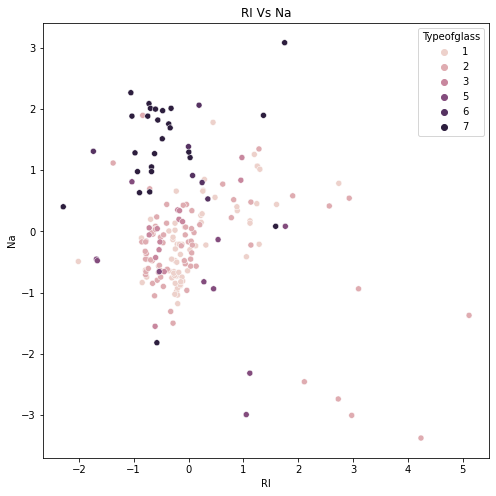

In [58]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="RI", y="Na", hue="Typeofglass", data=train_df)
plt.title("RI Vs Na")

Inference:


    1. Na seems to be the important factors to predict the glass types.
    2. RI has to be insignificant with the type of glass.


Text(0.5, 1.0, 'Mg Vs Al')

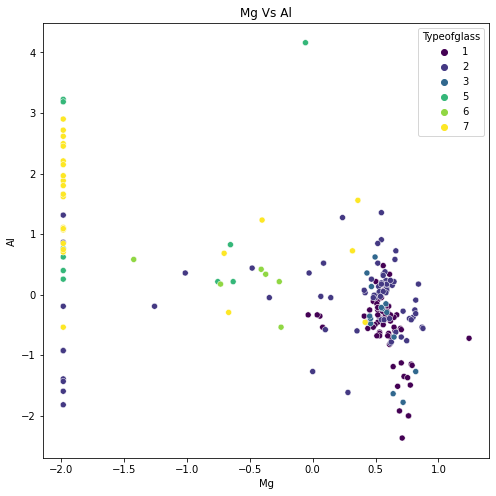

In [57]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Mg", y="Al", hue="Typeofglass",  palette="viridis",
                 data=train_df)
plt.title("Mg Vs Al")


Inference:

     1. Lower the Mg higher the type of glass.
     2. High amount of Al has significant with higher the type of glass.

Text(0, 0.5, 'K')

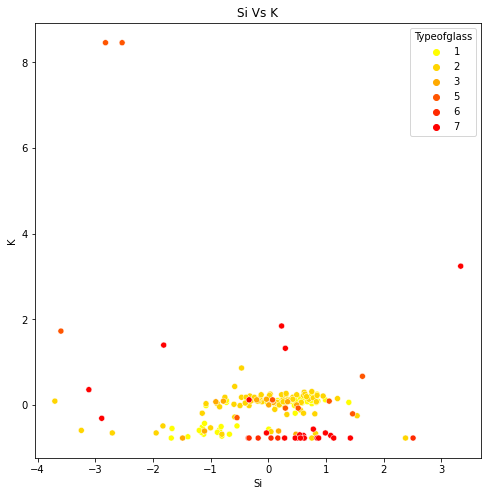

In [73]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Si", y="K", hue="Typeofglass", palette = "autumn_r",  data=train_df)
plt.title("Si Vs K")
plt.xlabel("Si")
plt.ylabel("K")

Inference: 

      1. Mostly all the type of glass seems to have lower value of K.
      2. Si has the moderate interference in predicting the glass types.

Text(0.5, 1.0, 'Ca Vs Ba')

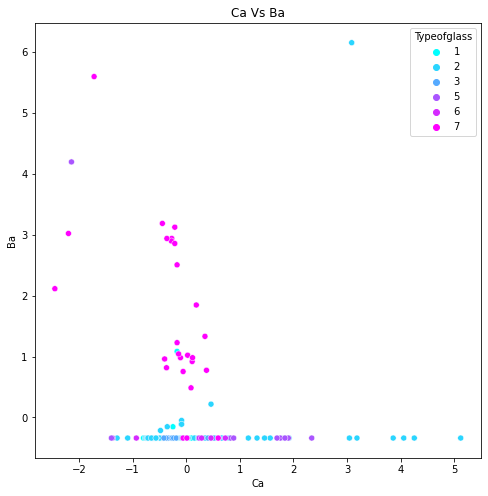

In [75]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Ca", y="Ba", hue="Typeofglass", palette = "cool",  data=train_df)
plt.title("Ca Vs Ba")

Inference:

        1. Higher the type of glasses, high the amount of Ba.
        2. Ca seems to have significant in deciding the glass type.

Text(0.5, 1.0, 'Ba Vs Fe')

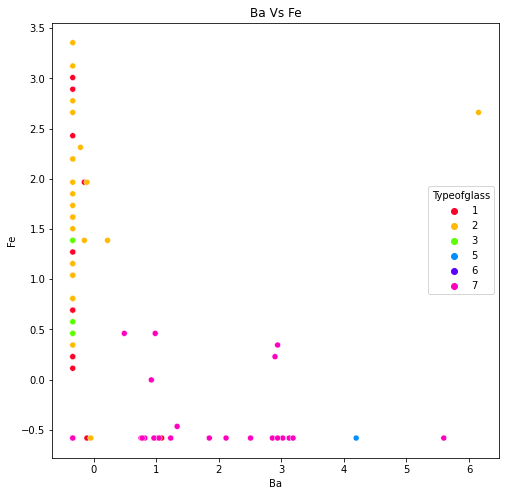

In [84]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Ba", y="Fe", hue="Typeofglass", palette = "gist_rainbow",  data=train_df)
plt.title("Ba Vs Fe")

Inference: 

       1. Ba seem to flow in the trend of glass type.
       2. Higher the amount of Fe lower the glass type.

Text(0.5, 1.0, 'Al Vs Ca')

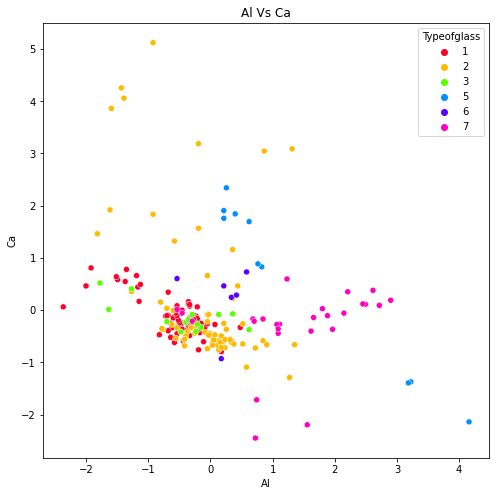

In [82]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Al", y="Ca", hue="Typeofglass", palette = "gist_rainbow",  data=train_df)
plt.title("Al Vs Ca")

Inference:
       
       1. Al plays the important factors in predicting the type of glasses.
       2. Higher the amount of Ca, lower the type of glasses.

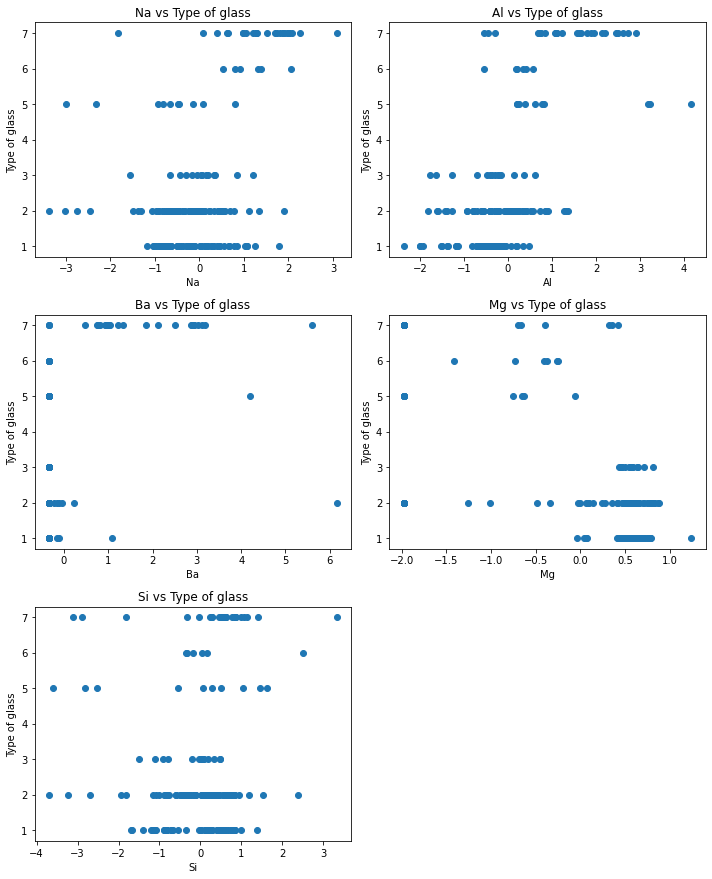

In [77]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(train_df[x], train_df['Typeofglass'])
    plt.title(x+' vs Type of glass')
    plt.ylabel('Type of glass')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Na', 1)
scatter('Al', 2)
scatter('Ba', 3)
scatter('Mg', 4)
scatter('Si', 5)

plt.tight_layout()

Inference:  
     
     1. Ba,Na,Al are giving the positive correlation in deciding the type of glasses.
     2. Mg, Si seems to insignificant with the glass type.

In [78]:
correlation = train_df.corr()

Text(0.5, 1.0, 'Correlation between the variables')

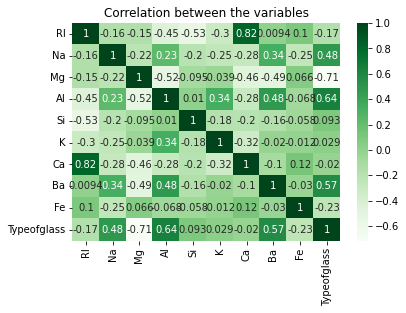

In [131]:
sns.heatmap(correlation,cmap="Greens", annot=True)
plt.title('Correlation between the variables')

Inference:
        
        1.  Highly correlated factors to predict the type of glasses are - Al, Ba, Na
      
        2.  Low correlated factors to type of glasses are - Ca, K, Si

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.spatial import distance
from sklearn import metrics
x_train = train_df.drop(["Typeofglass"], axis=1)
y_train = train_df["Typeofglass"]
x_test = test_df.drop("Typeofglass", axis=1) 
y_test = test_df["Typeofglass"]

In [118]:
euclid_model = KNeighborsClassifier(n_neighbors=10, metric=distance.sqeuclidean)
euclid_model.fit(x_train,y_train)
euclid_pred = euclid_model.predict(x_test)

print("Train set Accuaracy: ",  metrics.accuracy_score(y_train, euclid_model.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, euclid_pred))

Train set Accuaracy:  0.7142857142857143
Test set Accuracy:  0.6666666666666666


In [117]:
manhattan_model = KNeighborsClassifier(n_neighbors=10, metric=distance.cityblock) 
manhattan_model.fit(x_train, y_train)
manhattan_pred = manhattan_model.predict(x_test)

print("Train set Accuaracy: ",  metrics.accuracy_score(y_train, manhattan_model.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, manhattan_pred))


Train set Accuaracy:  0.7448979591836735
Test set Accuracy:  0.7222222222222222


In [110]:
df = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_pred, 'euclid': euclid_pred})
df.head()

,actual,manhattan,euclid
0,1,1,1
1,1,1,1
2,1,1,1
3,2,2,2
4,2,2,1


In [111]:
euclid_count = len(df.loc[df['euclid'] == df['actual']])

print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))
print(classification_report(y_test, euclid_pred, target_names=df['actual'].astype(str).unique()))

Square Euclidean Accuracy: 66.67%
              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.40      0.67      0.50         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3

    accuracy                           0.67        18
   macro avg       0.62      0.67      0.62        18
weighted avg       0.62      0.67      0.62        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Maximum accuracy with euclidean distance: 0.6666666666666666 at K = 0


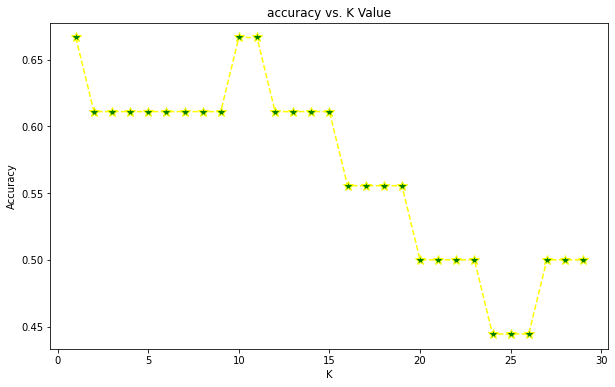

In [138]:
acc = []

for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = i, metric=distance.sqeuclidean ).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),acc,color = 'yellow',linestyle='dashed', 
         marker='*',markerfacecolor='green', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy with euclidean distance:",max(acc),"at K =",acc.index(max(acc)))

In [112]:
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])

print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print(classification_report(y_test, manhattan_pred, target_names=df['actual'].astype(str).unique()))

Manhattan Accuracy: 72.22%
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.43      1.00      0.60         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.72        18
   macro avg       0.70      0.72      0.66        18
weighted avg       0.70      0.72      0.66        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Maximum accuracy with Manhattan distance: 0.7222222222222222 at K = 9


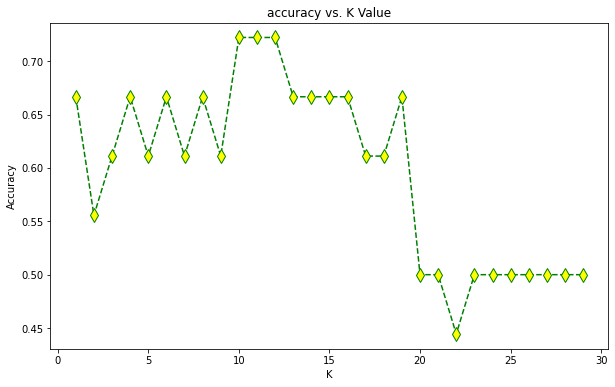

In [140]:
acc = []

for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = i, metric=distance.cityblock ).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),acc,color = 'green',linestyle='dashed', 
         marker='d',markerfacecolor='yellow', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy with Manhattan distance:",max(acc),"at K =",acc.index(max(acc)))

# Inference:
       1. Manhattan distance seems to have higher accuracy compared to Square Euclidean distance.